In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("E:\\LEARNBAY\\Projects\\April\\Engg_College_Data.csv")
df.head(2)

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3


In [4]:
df.isnull().sum()

SR_NO             0
Engg_College      0
Teaching          0
Fees              0
Placements        0
Internship        0
Infrastructure    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
df.describe()

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,2.807692,3.576923,2.884615,2.769231,3.384615
std,7.648529,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.250000,2.000000,2.250000,1.250000,2.000000,3.000000
50%,13.500000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,19.750000,3.000000,5.000000,4.000000,4.000000,4.750000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000


1. No missing data
2. No outlier treatment required in clustering....if many outliers then follow the process of DBSCAN(Density Based Special
cluster apllication with noise) 
3. No encoding required....as most of the data is numeric...only eng college name is categoriacl..
4. No imbalance data check...as no target variable present. 
5. No need of feature scaling as all the data is falling in approximately same range. 

Pre-processing is done

In [16]:
x = df.iloc[:,2:].values
x

array([[5, 2, 5, 5, 3],
       [4, 2, 5, 5, 3],
       [4, 5, 5, 4, 5],
       [5, 4, 5, 4, 4],
       [2, 5, 2, 2, 5],
       [3, 4, 3, 3, 4],
       [1, 3, 1, 1, 2],
       [4, 4, 5, 5, 5],
       [4, 4, 4, 4, 4],
       [3, 4, 3, 4, 5],
       [3, 4, 3, 4, 5],
       [2, 5, 3, 2, 3],
       [1, 5, 1, 2, 2],
       [3, 5, 3, 3, 4],
       [3, 2, 2, 2, 3],
       [3, 3, 2, 2, 3],
       [3, 3, 1, 2, 3],
       [3, 4, 4, 3, 3],
       [3, 5, 4, 3, 3],
       [3, 5, 3, 2, 3],
       [2, 2, 2, 2, 1],
       [2, 2, 1, 2, 1],
       [2, 5, 1, 1, 1],
       [1, 1, 1, 2, 5],
       [1, 1, 1, 1, 5],
       [3, 4, 5, 2, 3]], dtype=int64)

In [9]:
from sklearn.cluster import KMeans

In [17]:
wcss = []

for i in range(2,15):
    kmeans = KMeans(n_clusters = i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [18]:
abc = [1,2,3,4,5,6,7,8,9,10,11,12,13]

<AxesSubplot:>

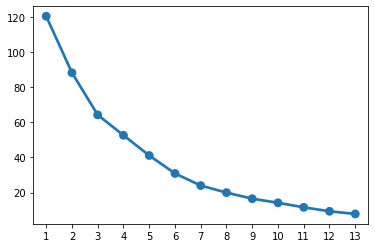

In [19]:
sns.pointplot(abc,wcss)

In [20]:
kmeans = KMeans(n_clusters= 5,random_state=1)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=1)

In [21]:
y_cluster = kmeans.fit_predict(x)

In [22]:
report = pd.concat([df,pd.DataFrame(y_cluster)],axis=1)

In [23]:
final_report = report.to_csv("Eng_College_Cluster.csv")

In [33]:
final = pd.read_csv("C:\\Users\\Swarn\\Downloads\\Eng_College_Cluster.csv")

In [34]:
final.head()

,Unnamed: 0,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,0
0,0,1,A,5,2,5,5,3,2
1,1,2,B,4,2,5,5,3,2
2,2,3,C,4,5,5,4,5,2
3,3,4,D,5,4,5,4,4,2
4,4,5,E,2,5,2,2,5,0


In [37]:
final.rename(columns = {'0':'Cluster'},inplace=True)
final.head(1)

,Unnamed: 0,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,Cluster
0,0,1,A,5,2,5,5,3,2


<AxesSubplot:xlabel='Cluster'>

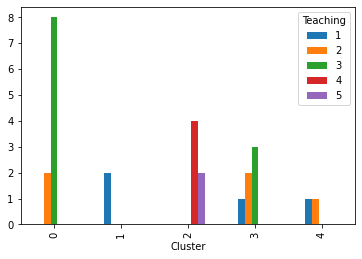

In [61]:
clu = pd.DataFrame(pd.crosstab(final['Cluster'],final['Teaching']))
clu.plot(kind='bar')

<AxesSubplot:xlabel='Cluster'>

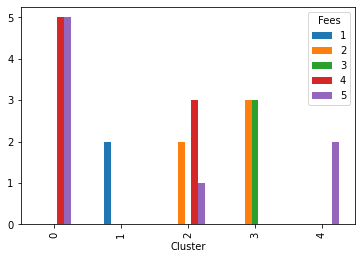

In [77]:
fee = pd.DataFrame(pd.crosstab(final['Cluster'],final['Fees']))
fee.plot(kind='bar')

<AxesSubplot:xlabel='Cluster'>

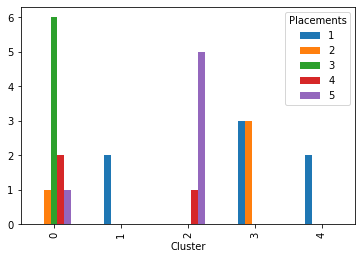

In [74]:
plmnt = pd.crosstab(final['Cluster'],final['Placements'])
plmnt.plot(kind='bar')

<AxesSubplot:xlabel='Cluster'>

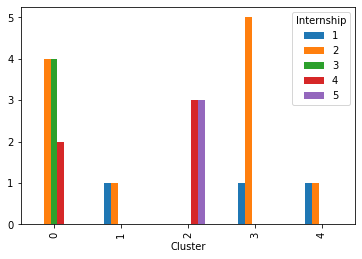

In [75]:
inrt = pd.crosstab(final['Cluster'],final['Internship'])
inrt.plot(kind='bar')

<AxesSubplot:xlabel='Cluster'>

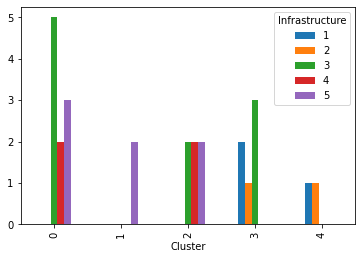

In [76]:
infra = pd.crosstab(final['Cluster'],final['Infrastructure'])
infra.plot(kind='bar')

CLuster 0 has highest teaching, highest fees, highest placement and highest ranking for infra.(considering 5 is most satisfied).
Rest follows. 

# Done.